In [1]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

In [2]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = cifar10.load_data()

In [3]:
print(X_treinamento.shape)
print(y_treinamento.shape)

(50000, 32, 32, 3)
(50000, 1)


In [4]:
print(X_teste.shape)
print(y_teste.shape)

(10000, 32, 32, 3)
(10000, 1)


Text(0.5, 1.0, 'Classe [9]')

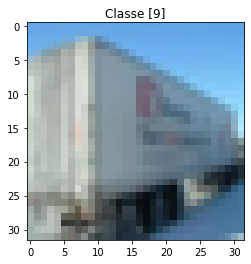

In [5]:
index=15
plt.imshow(X_treinamento[index])
plt.title('Classe ' + str(y_treinamento[index]))

Text(0.5, 1.0, 'Classe [9]')

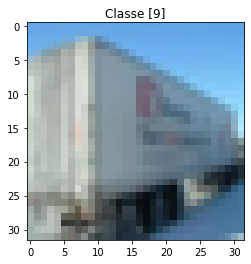

In [6]:
index=15
plt.imshow(X_treinamento[index], cmap = 'gray')
plt.title('Classe ' + str(y_treinamento[index]))

In [7]:
previsores_treinamento = X_treinamento.reshape(X_treinamento.shape[0],
                                               32, 32, 3)
previsores_teste = X_teste.reshape(X_teste.shape[0], 32, 32, 3)

In [8]:
previsores_treinamento = previsores_treinamento.astype('float32')
previsores_teste = previsores_teste.astype('float32')

In [9]:
previsores_treinamento /= 255
previsores_teste /= 255

Text(0.5, 1.0, 'Classe [9]')

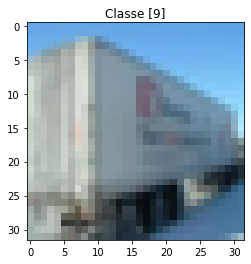

In [10]:
plt.imshow(previsores_treinamento[index])
plt.title('Classe ' + str(y_treinamento[index]))

In [11]:
classe_treinamento = np_utils.to_categorical(y_treinamento, 10)
classe_teste = np_utils.to_categorical(y_teste, 10)

In [12]:
previsores_treinamento.shape[1:]

(32, 32, 3)

In [19]:
classificador = Sequential()

#classificador Conv2D 1

classificador.add(Conv2D(128, # 32 detectors (64 é o recomendado inicial)
                         (3,3), # tamanho do kernel
                         input_shape=previsores_treinamento.shape[1:],
                         activation = 'relu'))

classificador.add(BatchNormalization())

classificador.add(MaxPooling2D(pool_size = (2,2)))

#classificador Conv2D 2

classificador.add(Conv2D(128, (3,3), activation = 'relu'))

classificador.add(BatchNormalization())

classificador.add(MaxPooling2D(pool_size = (2,2)))

classificador.add(Flatten())
classificador.add(Dropout(0.2))

classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))

classificador.add(Dense(units = (512), activation = 'relu'))
classificador.add(Dropout(0.2))

classificador.add(Dense(units = 10, 
                        activation = 'softmax'))

classificador.compile(loss = 'categorical_crossentropy',
                      optimizer = 'adam', metrics = ['accuracy'])

In [20]:
classificador.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization_12 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
batch_normalization_13 (Batc (None, 13, 13, 128)       512       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 128)        

In [21]:
classificador.fit(previsores_treinamento, classe_treinamento,
                  batch_size = 128, epochs = 5,
                  validation_data = (previsores_teste, classe_teste))

Epoch 1/5
391/391 [==============================] - 191s 489ms/step - loss: 1.4251 - accuracy: 0.4896 - val_loss: 3.6534 - val_accuracy: 0.1988
Epoch 2/5
391/391 [==============================] - 204s 521ms/step - loss: 1.0527 - accuracy: 0.6301 - val_loss: 1.1407 - val_accuracy: 0.5998
Epoch 3/5
391/391 [==============================] - 216s 553ms/step - loss: 0.9052 - accuracy: 0.6845 - val_loss: 1.0701 - val_accuracy: 0.6318
Epoch 4/5
391/391 [==============================] - 215s 550ms/step - loss: 0.8019 - accuracy: 0.7205 - val_loss: 1.1803 - val_accuracy: 0.5827
Epoch 5/5
391/391 [==============================] - 199s 510ms/step - loss: 0.7223 - accuracy: 0.7484 - val_loss: 0.9360 - val_accuracy: 0.6812
